In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df_origin = pd.read_csv('Android_Malware.csv', low_memory=False)

In [3]:
df = df_origin.copy() # Just in case ;)

In [3]:
df.shape

(355630, 86)

In [4]:
df.tail() # 'Unnamed:0' column is unknown. Learn more or delete

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
355625,405,172.217.7.14-10.42.0.211-80-38405-6,172.217.7.14,80,10.42.0.211,38405.0,6.0,17/06/2017 01:29:11,126711,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355626,406,10.42.0.211-10.42.0.1-7632-53-17,10.42.0.211,7632,10.42.0.1,53.0,17.0,17/06/2017 01:30:33,48012,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355627,407,10.42.0.211-104.192.110.245-45970-443-6,10.42.0.211,45970,104.192.110.245,443.0,6.0,17/06/2017 01:29:45,20028018,11,...,20.0,367528.0,0.0,367528.0,367528.0,19660490.0,0.0,19660490.0,19660490.0,Benign
355628,408,10.42.0.211-10.42.0.1-51982-53-17,10.42.0.211,51982,10.42.0.1,53.0,17.0,17/06/2017 01:29:45,347926,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
355629,409,10.42.0.211-10.42.0.1-9320-53-17,10.42.0.211,9320,10.42.0.1,53.0,17.0,17/06/2017 01:30:33,125473,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [5]:
df.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,355630.000000,3.556300e+05,3.556300e+05,355630.000000,3.556300e+05,355630.000000,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,...,355626.000000,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05,3.556260e+05
mean,1945.719231,3.914129e+04,5.202541e+03,9.765190,1.092975e+07,7.433718,1.420368e+01,6.796042e+02,1.129508e+04,2.150150e+02,...,1.524405,-2.831850e+04,1.628143e+05,2.195225e+04,1.851564e+05,1.456534e+05,4.025724e+06,3.182527e+05,4.304876e+06,3.779037e+06
std,1840.477646,1.794632e+04,1.452135e+04,750.541237,2.180861e+07,81.015658,2.220247e+03,1.942007e+04,2.763871e+05,1.834912e+03,...,14.938322,5.543875e+06,8.817765e+05,2.860244e+05,1.019477e+06,8.423659e+05,1.441518e+07,2.882901e+06,1.514008e+07,1.407042e+07
min,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,-1.395063e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,640.000000,3.455900e+04,8.000000e+01,6.000000,4.888600e+04,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1568.000000,4.322600e+04,4.430000e+02,6.000000,5.602255e+05,2.000000,1.000000e+00,3.100000e+01,2.600000e+01,3.100000e+01,...,0.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2718.000000,5.228300e+04,4.430000e+02,6.000000,1.076907e+07,5.000000,4.000000e+00,4.300000e+02,3.010000e+02,3.430000e+02,...,1.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,14157.000000,1.045267e+06,1.328159e+06,442719.666667,1.199999e+08,27165.000000,1.319105e+06,9.043781e+06,8.050972e+07,1.072354e+06,...,6335.000000,1.705248e+08,9.718488e+07,4.020815e+07,9.718488e+07,9.718488e+07,1.199514e+08,7.737303e+07,1.199514e+08,1.199514e+08


In [6]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [18]:
df[df[' Total Fwd Packets'] > df[' Total Backward Packets']]['Label'].value_counts()

Android_Adware         71838
Android_Scareware      57933
Android_SMS_Malware    34058
Benign                 10955
Name: Label, dtype: int64

Adware seems to have more Fwd packets than Bwd packets, as they load Ads from somewhere....

In [3]:
columns_with_null = df.columns[df.isnull().any()]
df_null_counts = df[columns_with_null].isnull().sum()
print(df_null_counts[df_null_counts > 0])

Flow ID                     1
 Bwd Packets/s              1
 Min Packet Length          1
 Max Packet Length          1
 Packet Length Mean         1
 Packet Length Std          1
 Packet Length Variance     1
FIN Flag Count              1
 SYN Flag Count             1
 RST Flag Count             1
 PSH Flag Count             1
 ACK Flag Count             1
 URG Flag Count             1
 CWE Flag Count             1
 ECE Flag Count             2
 Down/Up Ratio              2
 Average Packet Size        3
 Avg Fwd Segment Size       3
 Avg Bwd Segment Size       3
 Fwd Header Length.1        3
Fwd Avg Bytes/Bulk          3
 Fwd Avg Packets/Bulk       4
 Fwd Avg Bulk Rate          4
 Bwd Avg Bytes/Bulk         4
 Bwd Avg Packets/Bulk       4
Bwd Avg Bulk Rate           4
Subflow Fwd Packets         4
 Subflow Fwd Bytes          4
 Subflow Bwd Packets        4
 Subflow Bwd Bytes          4
Init_Win_bytes_forward      4
 Init_Win_bytes_backward    4
 act_data_pkt_fwd           4
 min_seg_s

In [8]:
df_null_counts.shape 
# 42 columns with null values - how do we handle?

(42,)

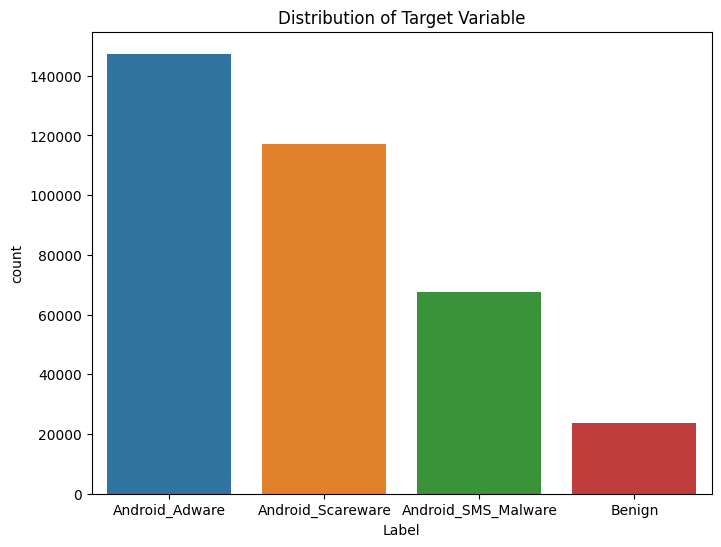

In [9]:
# Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [4]:
# Calculate the variance of each column
numdf = df.select_dtypes(include="number")
variance_per_column = numdf.var()

# Set a threshold for minimum variance
threshold = 0.01  # You can adjust this threshold based on your preference

# Identify columns with variance below the threshold
low_variance_columns = variance_per_column[variance_per_column < threshold].index.tolist()

print(low_variance_columns)
# Consider removing these columns as well
# [' ECE Flag Count', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', 
#  ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']

[' ECE Flag Count', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


C:\Users\nsun5\AppData\Local\Temp\ipykernel_54620\742972658.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance_per_column = df.var()


In [5]:
correlation_matrix = numdf.corr()

# Get the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find highly correlated columns
highly_correlated_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Print or further analyze the highly correlated columns
print("Highly correlated columns to consider removing:", highly_correlated_columns)

C:\Users\nsun5\AppData\Local\Temp\ipykernel_54620\3377474936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Highly correlated columns to consider removing: [' Total Backward Packets', ' Fwd Packet Length Max', ' Flow IAT Max', ' Flow IAT Min', ' Fwd IAT Mean', ' Fwd IAT Max', ' Fwd IAT Min', ' Bwd IAT Max', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Bwd Header Length', 'Fwd Packets/s', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', ' act_data_pkt_fwd', ' Active Max', ' Active Min', ' Idle Max', ' Idle Min']


'Total Backward Packets' and 'Total Fwd Packets': These two features are highly correlated, which is expected since they represent similar information. You may consider keeping only one of them.

'Fwd Packet Length Max' and 'Packet Length Mean': These features are highly correlated, suggesting redundancy. You might want to keep one that is more relevant to your analysis.

'Fwd IAT Mean', 'Fwd IAT Max', and 'Fwd IAT Min': These features related to inter-arrival times are highly correlated. You may choose to keep one representative feature.

'Bwd IAT Max' and 'Fwd IAT Max': These features are highly correlated, indicating redundancy. You might want to keep the one that aligns better with your analysis.

'Fwd PSH Flags' and 'Bwd PSH Flags': These features are highly correlated, suggesting similarity. Consider keeping one that is more relevant to your analysis.

'Fwd Packets/s' and 'Flow IAT Max': These features are highly correlated, and you may want to keep the one that aligns better with your analysis.

### From EDA here are some potential columns that we can drop

In [4]:
# Remove leading spaces from column names
df.columns = df.columns.str.strip()

In [5]:
# Define the pairs of columns for differences
packet_pairs = [('Total Fwd Packets', 'Total Backward Packets'),
                ('Total Length of Fwd Packets', 'Total Length of Bwd Packets'),
                ('Fwd IAT Total', 'Bwd IAT Total'),
                ('Fwd PSH Flags', 'Bwd PSH Flags'),
                ('Fwd URG Flags', 'Bwd URG Flags'),
                ('Fwd Header Length', 'Bwd Header Length'),
                ('Fwd Packets/s', 'Bwd Packets/s'),
                ('Avg Fwd Segment Size', 'Avg Bwd Segment Size'),
                ('Fwd Avg Bytes/Bulk', 'Bwd Avg Bytes/Bulk'),
                ('Fwd Avg Packets/Bulk', 'Bwd Avg Packets/Bulk'),
                ('Fwd Avg Bulk Rate', 'Bwd Avg Bulk Rate'),
                ('Subflow Fwd Packets', 'Subflow Bwd Packets'),
                ('Subflow Fwd Bytes', 'Subflow Bwd Bytes'),
                ('Init_Win_bytes_forward', 'Init_Win_bytes_backward')]

# Convert columns to numeric before calculating differences
df = df.apply(pd.to_numeric, errors='coerce')

# Calculate differences for each pair and create separate columns
for pair in packet_pairs:
    col_name_diff = f'{pair[0]} - {pair[1]}'
    df[col_name_diff] = df[pair[0]] - df[pair[1]]

# Display the resulting DataFrame
print(df)

        Unnamed: 0  Flow ID  Source IP  Source Port  Destination IP  \
0                0      NaN        NaN        50004             NaN   
1                1      NaN        NaN        35455             NaN   
2                2      NaN        NaN        51775             NaN   
3                3      NaN        NaN        51775             NaN   
4                4      NaN        NaN        51776             NaN   
...            ...      ...        ...          ...             ...   
355625         405      NaN        NaN           80             NaN   
355626         406      NaN        NaN         7632             NaN   
355627         407      NaN        NaN        45970             NaN   
355628         408      NaN        NaN        51982             NaN   
355629         409      NaN        NaN         9320             NaN   

        Destination Port  Protocol  Timestamp  Flow Duration  \
0                  443.0       6.0        NaN          37027   
1                  

In [6]:
# List of all columns to drop
columns_to_drop = [
    'Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port',
    'Protocol', 'Timestamp', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
    'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Std',
    'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Std',
    'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Total', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
    'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
    'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
    'Min Packet Length', 'Max Packet Length', 'Packet Length Std', 'Packet Length Variance',
    'ECE Flag Count', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
    'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
    'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
    'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'Active Std', 'Active Max', 'Active Min', 'Idle Std', 'Idle Max', 'Idle Min'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop, errors='ignore')

In [7]:
df.shape

(355630, 37)

In [26]:
df.columns

Index(['Flow Duration', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Min', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'CWE Flag Count', 'Down/Up Ratio', 'Average Packet Size'

In [8]:
df.describe()

,Flow Duration,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Fwd IAT Mean,Bwd IAT Mean,Packet Length Mean,FIN Flag Count,...,Fwd URG Flags - Bwd URG Flags,Fwd Header Length - Bwd Header Length,Fwd Packets/s - Bwd Packets/s,Avg Fwd Segment Size - Avg Bwd Segment Size,Fwd Avg Bytes/Bulk - Bwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk - Bwd Avg Packets/Bulk,Fwd Avg Bulk Rate - Bwd Avg Bulk Rate,Subflow Fwd Packets - Subflow Bwd Packets,Subflow Fwd Bytes - Subflow Bwd Bytes,Init_Win_bytes_forward - Init_Win_bytes_backward
count,3.556300e+05,355630.000000,355630.000000,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,3.556300e+05,355629.000000,355629.000000,...,355630.000000,3.556300e+05,3.556290e+05,355627.000000,355626.0,355626.0,355626.0,355626.000000,3.556260e+05,355626.000000
mean,1.092975e+07,59.643539,168.537728,8.398908e+04,5.494580e+03,3.175805e+06,3.206486e+06,9.461561e+05,115.158037,0.041301,...,0.002126,8.207316e+05,3.870642e+03,-108.892824,0.0,0.0,0.0,-3.137181,-1.061501e+04,21354.297723
std,2.180861e+07,119.309000,311.332303,9.112698e+05,3.913503e+04,8.459869e+06,8.859162e+06,4.583215e+06,193.966724,14.689980,...,1.281203,2.471576e+08,3.545143e+04,312.014179,0.0,0.0,0.0,131.145200,2.768411e+05,29856.085938
min,-1.000000e+00,0.000000,0.000000,0.000000e+00,-2.000000e+06,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000,0.000000,...,-8.000000,-1.688196e+10,-2.500000e+05,-1460.000000,0.0,0.0,0.0,-37775.000000,-8.050952e+07,-65535.000000
25%,4.888600e+04,0.000000,0.000000,0.000000e+00,6.318762e-01,2.457425e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,-83.000000,0.0,0.0,0.0,0.000000,-9.900000e+01,0.000000
50%,5.602255e+05,28.500000,15.500000,8.986458e+01,7.758975e+00,2.305935e+05,4.528030e+04,0.000000e+00,35.333333,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00,1387.000000
75%,1.076907e+07,54.250000,150.750000,2.373444e+03,6.327312e+01,2.127172e+06,1.842099e+06,4.186954e+04,124.666667,0.000000,...,0.000000,5.600000e+01,5.398507e-01,0.000000,0.0,0.0,0.0,2.000000,0.000000e+00,64815.000000
max,1.199999e+08,1460.000000,1460.000000,1.705000e+08,2.000000e+06,1.199514e+08,1.199514e+08,1.192258e+08,1373.111111,8760.000000,...,764.000000,1.088148e+11,2.000000e+06,1460.000000,0.0,0.0,0.0,2996.000000,9.039466e+06,65536.000000


Unnamed: 0: This column seems to be an index or identifier and may not provide meaningful information for classification.

Flow ID: If this column is just a unique identifier for network flows, it might not contribute much to the classification task.

Source IP, Source Port, Destination IP, Destination Port, Protocol: Depending on your model's objective, these details might not be crucial for detecting Android malware.

Timestamp: If the temporal aspect is not a key factor in your classification, you may consider dropping this column or extracting relevant features.

Init_Win_bytes_forward, Init_Win_bytes_backward: If these are not critical features for your model, you might exclude them.

Fwd Header Length.1: If this is a duplicate entry, it can be dropped.

Subflow Fwd Packets, Subflow Fwd Bytes, Subflow Bwd Packets, Subflow Bwd Bytes: Depending on your feature selection strategy, these might not be necessary.

act_data_pkt_fwd, min_seg_size_forward: Assess their importance based on their correlation with the target variable.

Total Fwd Packets, Packet Length Mean, Fwd IAT Mean, Fwd IAT Max, Bwd PSH Flags, Flow IAT Max: These are from highly correlated pairs, and keeping only one from each pair helps reduce redundancy in the dataset.

ECE Flag Count, Fwd Avg Packets/Bulk, Fwd Avg Bulk Rate, Bwd Avg Bytes/Bulk, Bwd Avg Packets/Bulk, Bwd Avg Bulk Rate: These are considered based on variance, and if they have low variance, they may not provide much information for the model.

### Possible consolidation of features

Packet Length Features:

'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std'
'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std'
You might consider consolidating these into a single metric, such as the range (Max - Min) or the standard deviation, depending on the relevance to your problem.

Flow IAT Features:

'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Min'
'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Min'
'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min'
Similar to the packet length features, you might consider consolidating these based on your problem requirements.

Flags:

'Fwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags'
'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count'
Depending on the information these flags convey, you might choose to consolidate them or keep them separate.

Packet Rate Features:

'Fwd Packets/s', 'Bwd Packets/s'
If the rate of packets is essential, you might keep one feature representing the overall packet rate.

Packet Size Features:

'Min Packet Length', 'Max Packet Length', 'Packet Length Std', 'Packet Length Variance'
'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Avg Bytes/Bulk'
These features might convey similar information, and you can consider consolidating them based on the specific metric's relevance.